<h1>Network of Reddit Users with Negative Sentiments (Coronavirus Anti Lockdown)</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: casualphilosopher1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('../Reddit_Sentiments/antilockdown_sentiments.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,sentiment_polarity_summary
0,0,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,schu4KSU,peopl like everywher world differ enough gain ...,1,0.7096,positive
1,1,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,StupidizeMe,well certainli enough caus massiv surg covid 1...,0,-0.4215,neutral
2,2,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Eltharion-the-Grim,they larg absent asia the place i recal read s...,0,0.0000,neutral
3,3,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Thisam,yup percentag popul easili deceiv fall conspir...,0,0.0772,neutral
4,4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,short answer ye look usa brexit pass long answ...,0,-0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1516,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,BigDaddyCoolDeisel,is fuck question anymor,1,-0.5423,negative
1517,1517,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,NaN,remov,1,0.0000,neutral
1518,1518,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,AutoModerator,your comment remov pure polit post comment rem...,0,0.0000,neutral
1519,1519,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,Tysk_Kille,fake news,1,-0.4767,neutral


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,casualphilosopher1,schu4KSU,peopl like everywher world differ enough gain ...,Undirected,1
1,casualphilosopher1,StupidizeMe,well certainli enough caus massiv surg covid 1...,Undirected,1
2,casualphilosopher1,Eltharion-the-Grim,they larg absent asia the place i recal read s...,Undirected,1
3,casualphilosopher1,Thisam,yup percentag popul easili deceiv fall conspir...,Undirected,1
4,casualphilosopher1,NaN,short answer ye look usa brexit pass long answ...,Undirected,1
...,...,...,...,...,...
1516,WearyThanks,BigDaddyCoolDeisel,is fuck question anymor,Undirected,1
1517,WearyThanks,NaN,remov,Undirected,1
1518,WearyThanks,AutoModerator,your comment remov pure polit post comment rem...,Undirected,1
1519,WearyThanks,Tysk_Kille,fake news,Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'signed7']
author

,author,commenter,comment,type,weight
991,signed7,NaN,delet,Undirected,1
992,signed7,NaN,remov,Undirected,1
993,signed7,wittedsownder,anti lockdown term use realli anti vaxx conspi...,Undirected,1
994,signed7,ohsnapitsnathan,there pandem frank militari veteran one organ ...,Undirected,1
995,signed7,sjgirjh9orj,might brain head,Undirected,1
...,...,...,...,...,...
1056,signed7,tmleafsfan,what wrong peopl where cultur tradit everyon k...,Undirected,1
1057,signed7,sec5,over time slowli becam infect american,Undirected,1
1058,signed7,lostandfound8888,don worri hockey riot come multitask,Undirected,1
1059,signed7,NaN,remov,Undirected,1


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,Altruistic_Astronaut,0x1FFFF,1
1,Altruistic_Astronaut,BlankEris,1
2,Altruistic_Astronaut,DanoPinyon,1
3,Altruistic_Astronaut,Deadlift_007,1
4,Altruistic_Astronaut,GerritDeSenieleEend,1
...,...,...,...
1091,vostok-Abdullah,whichwitch9,1
1092,vostok-Abdullah,yeetingAnyone,1
1093,vostok-Abdullah,zeeeee,1
1094,vostok-Abdullah,zephyreblk,1


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
577,casualphilosopher1,Blueskiesbroken97,6
1045,signed7,lostandfound8888,5
572,casualphilosopher1,AutoModerator,5
886,mfbrucee,bronet,5
1071,vostok-Abdullah,Typical_Hoodlum,4


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 1032 nodes and 1096 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
# weighted_degrees
# print(sum(weighted_degrees.values()))
# print(len(weighted_degrees.values()))
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

2.374031007751938

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 2.35])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 50 nodes and 82 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(network, weight='weight', iterations=20, k=4)

<ipython-input-14-27c22ca7d005>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


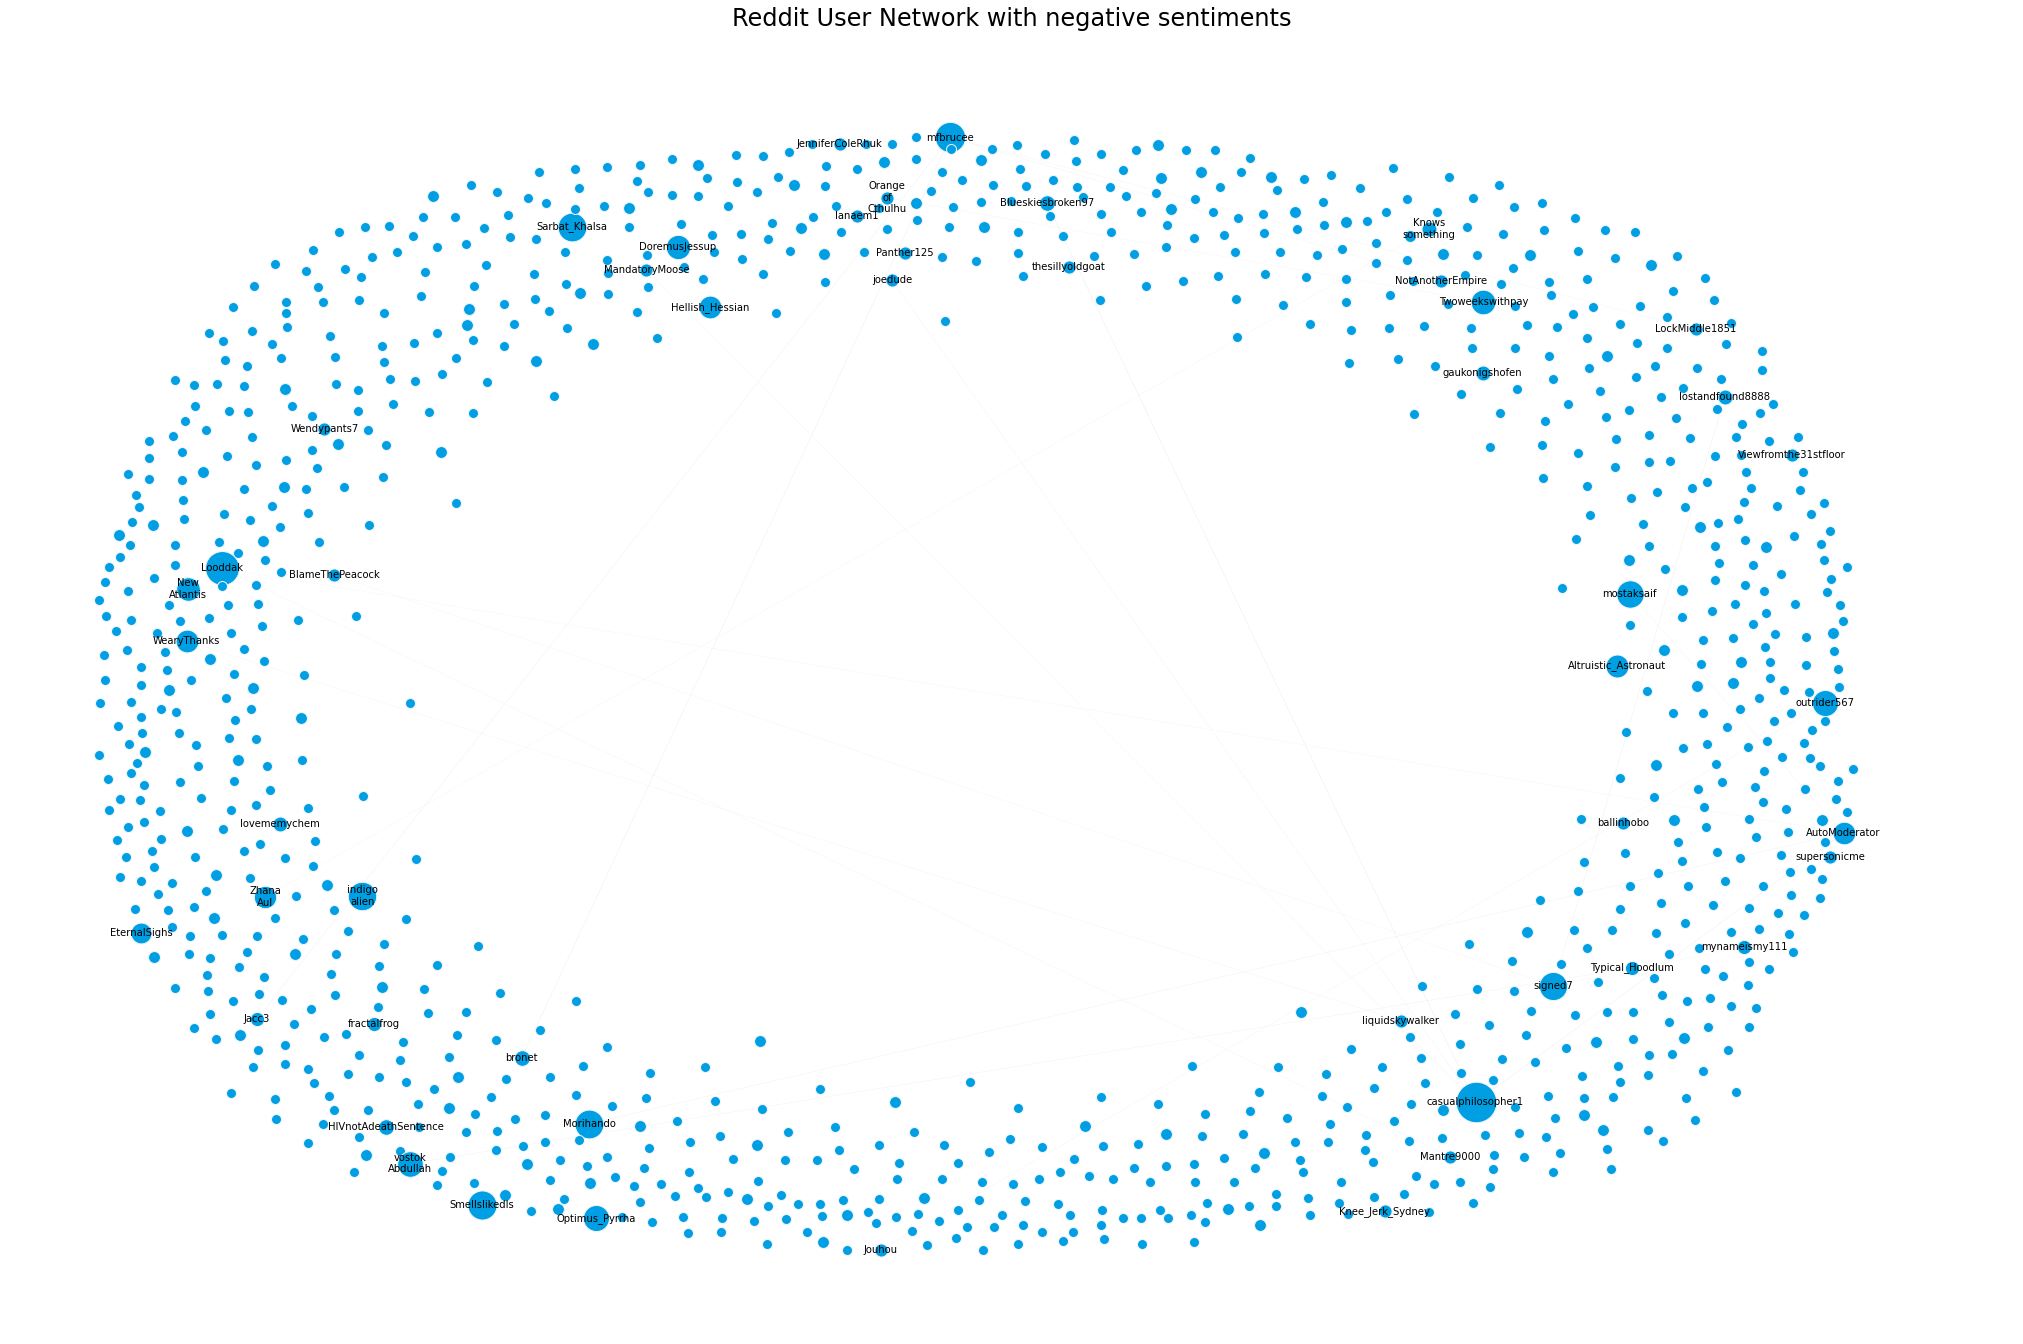

In [14]:
# Plot subgraph's network

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with negative sentiments', fontsize = 24)


for node in network.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(network, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(network, pos, {n:n.replace('-','\n') for n in network.nodes() if weighted_degrees[n]>2.35},font_size=10);

for e in network.edges(data=True):
     if e[2]['weight']>2.35:
        nx.draw_networkx_edges(network, pos,[e], width=e[2]['weight']/100, edge_color='#707070')
        
fig.set_size_inches(figsize * 6)
fig.show()

In [15]:
# Most negative user and its comments

author = reddit_sentiments[(reddit_sentiments['author'] == 'casualphilosopher1') & (reddit_sentiments['sentiment_polarity'] == 'negative')]
author

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,sentiment_polarity_summary


In [16]:
# Node-level Statistics
# Normalize - Better for comparison between different networks

print("Number of nodes in subGraph: ", subGraph.number_of_nodes())
print("==========================================")
print("Number of edges in subGraph: ", subGraph.number_of_edges())
print("==========================================")
print("Nodes' Degree Centrality (Non-Normalized) in subGraph: ", nx.degree(subGraph))
print("==========================================")
print("Nodes' Degree Centrality (Normalized) in subGraph: ", nx.degree_centrality(subGraph))

Number of nodes in subGraph:  50
Number of edges in subGraph:  82
Nodes' Degree Centrality (Non-Normalized) in subGraph:  [('DoremusJessup', 2), ('supersonicme', 2), ('lovememychem', 3), ('mostaksaif', 1), ('signed7', 5), ('mynameismy111', 2), ('JenniferColeRhuk', 2), ('HIVnotAdeathSentence', 5), ('fractalfrog', 3), ('NotAnotherEmpire', 1), ('MandatoryMoose', 1), ('Jouhou', 1), ('Sarbat_Khalsa', 2), ('Optimus_Pyrrha', 4), ('Orange-of-Cthulhu', 1), ('gaukonigshofen', 5), ('mfbrucee', 14), ('LockMiddle1851', 1), ('Knee_Jerk_Sydney', 1), ('Altruistic_Astronaut', 1), ('Panther125', 3), ('WearyThanks', 4), ('BlameThePeacock', 1), ('Zhana-Aul', 2), ('indigo-alien', 10), ('Blueskiesbroken97', 1), ('Mantre9000', 1), ('liquidskywalker', 1), ('joedude', 1), ('EternalSighs', 2), ('thesillyoldgoat', 3), ('New-Atlantis', 4), ('vostok-Abdullah', 4), ('outrider567', 4), ('Smellslikedls', 4), ('Hellish_Hessian', 3), ('lanaem1', 3), ('Viewfromthe31stfloor', 3), ('Jacc3', 1), ('Twoweekswithpay', 7), ('c

In [17]:
# Node-level Statistics

print("Nodes' Closeness Centrality in subGraph: ", nx.closeness_centrality(subGraph))
print("==========================================")
print("Nodes' Eigenvector Centrality in subGraph: ", nx.eigenvector_centrality(subGraph))
print("==========================================")
print("Nodes' Betweenness Centrality (Normalized) in subGraph: ", nx.betweenness_centrality(subGraph, normalized=True))

Nodes' Closeness Centrality in subGraph:  {'DoremusJessup': 0.3684210526315789, 'supersonicme': 0.310126582278481, 'lovememychem': 0.3656716417910448, 'mostaksaif': 0.34265734265734266, 'signed7': 0.3684210526315789, 'mynameismy111': 0.3181818181818182, 'JenniferColeRhuk': 0.3141025641025641, 'HIVnotAdeathSentence': 0.3602941176470588, 'fractalfrog': 0.35, 'NotAnotherEmpire': 0.310126582278481, 'MandatoryMoose': 0.28, 'Jouhou': 0.22477064220183487, 'Sarbat_Khalsa': 0.26063829787234044, 'Optimus_Pyrrha': 0.28488372093023256, 'Orange-of-Cthulhu': 0.2752808988764045, 'gaukonigshofen': 0.3402777777777778, 'mfbrucee': 0.44545454545454544, 'LockMiddle1851': 0.310126582278481, 'Knee_Jerk_Sydney': 0.28, 'Altruistic_Astronaut': 0.266304347826087, 'Panther125': 0.35, 'WearyThanks': 0.3475177304964539, 'BlameThePeacock': 0.27071823204419887, 'Zhana-Aul': 0.26344086021505375, 'indigo-alien': 0.4298245614035088, 'Blueskiesbroken97': 0.28, 'Mantre9000': 0.2737430167597765, 'liquidskywalker': 0.25925

In [18]:
# Network-level Statistics

print("Network Density in subGraph: ", nx.density(subGraph))
print("==========================================")
print("Network Diameter in subGraph: ", nx.diameter(subGraph))
print("==========================================")
print("Network Average path length in subGraph: ", nx.average_shortest_path_length(subGraph))

Network Density in subGraph:  0.06693877551020408
Network Diameter in subGraph:  6
Network Average path length in subGraph:  3.1910204081632654


In [19]:
# Network-level Statistics

num_max_reachable_other_nodes = subGraph.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(subGraph.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(subGraph, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  49
Current node is DoremusJessup  and node-level reachability is 1.0
{'supersonicme', 'lovememychem', 'mostaksaif', 'signed7', 'mynameismy111', 'HIVnotAdeathSentence', 'JenniferColeRhuk', 'fractalfrog', 'NotAnotherEmpire', 'MandatoryMoose', 'Jouhou', 'Sarbat_Khalsa', 'Optimus_Pyrrha', 'Orange-of-Cthulhu', 'gaukonigshofen', 'mfbrucee', 'LockMiddle1851', 'Knee_Jerk_Sydney', 'Altruistic_Astronaut', 'Panther125', 'WearyThanks', 'BlameThePeacock', 'Zhana-Aul', 'indigo-alien', 'Blueskiesbroken97', 'Mantre9000', 'liquidskywalker', 'joedude', 'EternalSighs', 'thesillyoldgoat', 'New-Atlantis', 'vostok-Abdullah', 'outrider567', 'Smellslikedls', 'Hellish_Hessian', 'lanaem1', 'Viewfromthe31stfloor', 'Jacc3', 'casualphilosopher1', 'Twoweekswithpay', 'AutoModerator', 'Looddak', 'bronet', 'Typical_Hoodlum', 'Knows-something', 'lostandfound8888', 'Wendypants7', 'ballinhobo', 'Morihando'}
Current node is supersonicme  and node-level reachability is 1.0
{'DoremusJ